<a href="https://colab.research.google.com/github/tianhuil/Google-Colab/blob/main/Drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
import matplotlib
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams['font.size'] = 18  # Probably OS Dependent

In [3]:
dfs = pd.read_html('https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart')
df = dfs[0]
df.columns = df.columns.map(lambda x: x[1])
df = df.loc[::-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

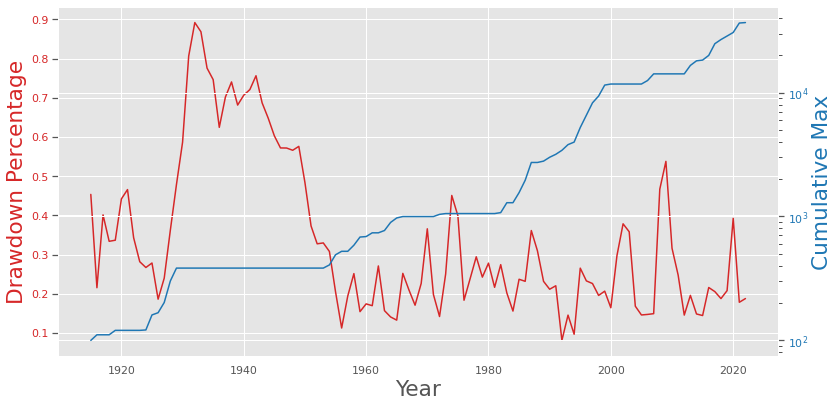

In [4]:
df['Cum Max'] = df['Year High'].cummax()
df['Drawdown'] = df['Cum Max'] - df['Year Low']
df['Drawdown Percentage'] = df['Drawdown'] / df['Cum Max']
fig, ax1 = plt.subplots()

df.set_index('Year')['Drawdown Percentage'].plot(ax=ax1, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylabel('Drawdown Percentage', color='tab:red')

ax2 = ax1.twinx() 

df.set_index('Year')['Cum Max'].plot(ax=ax2, logy=True, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('Cumulative Max', color='tab:blue')

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


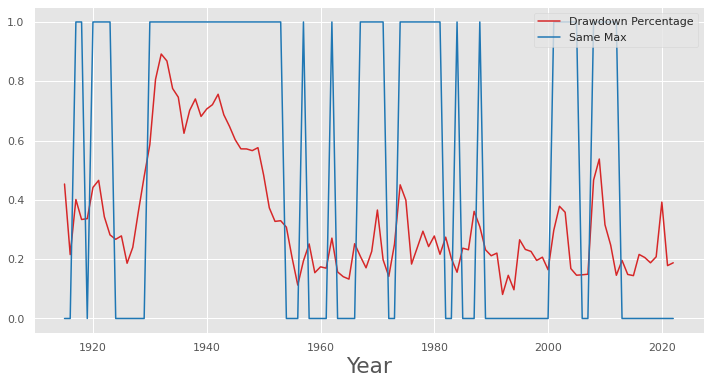

In [5]:
df['Same Max'] = (df['Cum Max'] == df['Cum Max'].shift(1)).astype(int)

fig, ax = plt.subplots()

df.set_index('Year')['Drawdown Percentage'].plot(color='tab:red')
df.set_index('Year')['Same Max'].plot(color='tab:blue')
ax.legend(loc='upper right')